In [59]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

In [60]:
%matplotlib notebook

In [3]:
dummy   = 'task.json'
os.path.splitext(dummy)

('task', '.json')

In [43]:
def collect_results_gB1(result_dir, param_dir):
    xs = []
    ys = []
    for filename in sorted(list(os.listdir(result_dir))):
        val = 0.0
        filepath = os.path.join(result_dir, filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            for line in f:
                if line.startswith('#'):
                    continue
                val = float(line.strip())
                break
        ys.append(val)

        name_part, ext = os.path.splitext(filename)
        param_filename = f'{name_part}.json'
        filepath = os.path.join(param_dir, param_filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            data = json.load(f)
            x = data['pulseseq']['components']['emr2']['e']['frequency']/1e6
            xs.append(float(x))
    return xs, ys

def collect_results_length(result_dir, param_dir, param_name):
    xs = []
    ys = []
    for filename in sorted(list(os.listdir(result_dir))):
        val = 0.0
        filepath = os.path.join(result_dir, filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            for line in f:
                if line.startswith('#'):
                    continue
                val = float(line.strip())
                break
        ys.append(val)

        name_part, ext = os.path.splitext(filename)
        param_filename = f'{name_part}.json'
        filepath = os.path.join(param_dir, param_filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            data = json.load(f)
            x = data['pulseseq']['sections'][param_name]['size']
            xs.append(float(x))
    return xs, ys

def collect_results_fp(result_dir, param_dir):
    xs = []
    ys = []
    for filename in sorted(list(os.listdir(result_dir))):
        val = 0.0
        filepath = os.path.join(result_dir, filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            for line in f:
                if line.startswith('#'):
                    continue
                val = float(line.strip())
                break
        ys.append(val)

        name_part, ext = os.path.splitext(filename)
        param_filename = f'{name_part}.json'
        filepath = os.path.join(param_dir, param_filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            data = json.load(f)
            x = data['settings']['Magnet']['b0']
            xs.append(float(x))
    return xs, ys

<IPython.core.display.Javascript object>


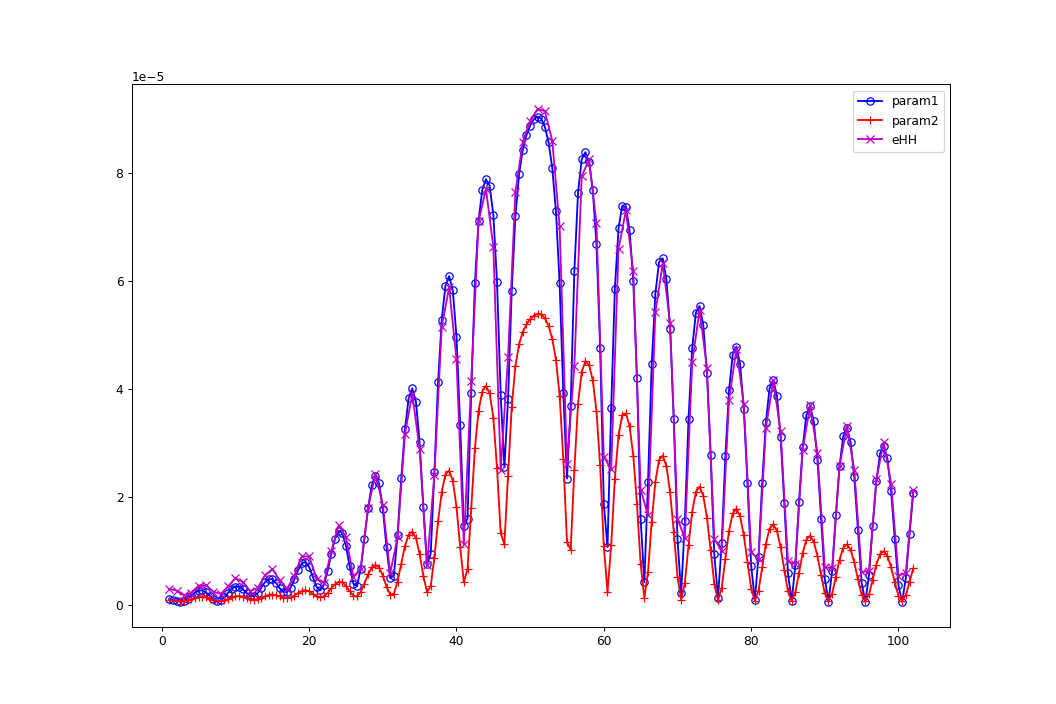

In [44]:
eofe_results_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_outputs/NOVEL/tasks'
eofe_params_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_inputs/NOVEL'
collection_name = 'scan_gB1_param1'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs, ys = collect_results_gB1(result_dir, param_dir)

collection_name = 'scan_gB1_param2'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs2, ys2 = collect_results_gB1(result_dir, param_dir)

root_dir = '/home/chen/coding/projects/dnpsoup'
filename = 'dnpsoup_analytics/outputs/NOVEL/HeHH/qband_scan_gB1_mix200_loop1000_zcw2_55.result'
filepath = os.path.join(root_dir, filename)
df = pd.read_csv(filepath, skiprows=2, header=None)


fig = plt.figure(figsize=(12, 8), dpi=80)
plt.plot(xs, ys, 'bo-', markerfacecolor='none', label='param1')
plt.plot(xs2, ys2, 'r+-', markerfacecolor='none', label='param2')
plt.plot(df[0]/1e6, df[1]*2.5e-6, 'mx-', markerfacecolor='none', label='eHH')
plt.legend()
plt.show()

## xband

0.34969999999999946


<IPython.core.display.Javascript object>


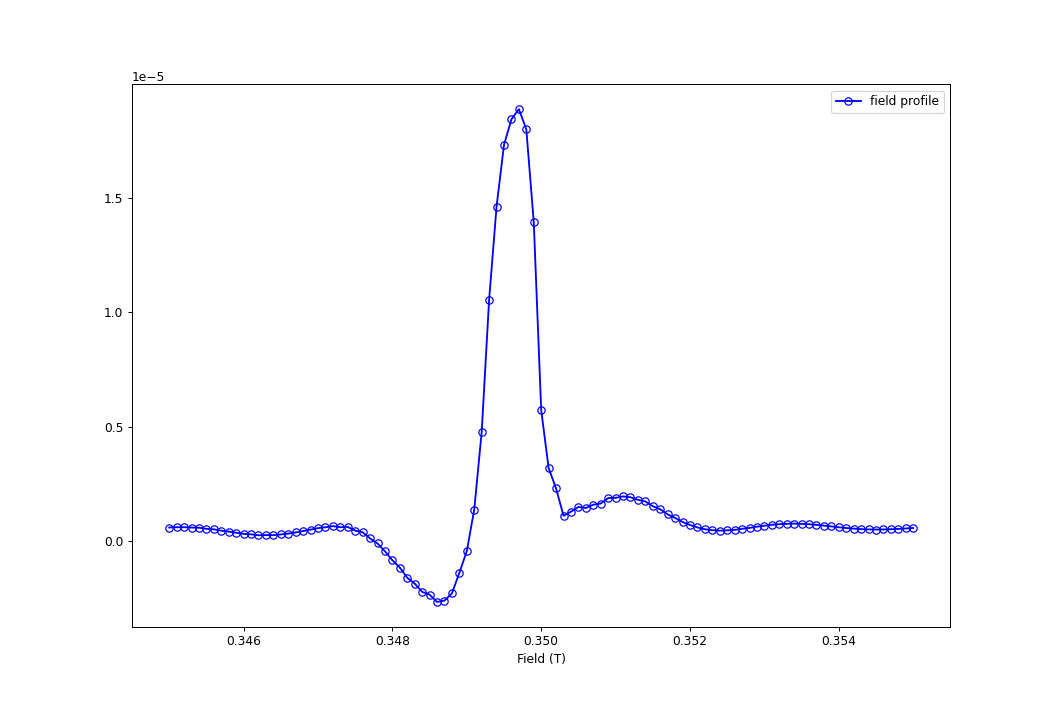

In [45]:
eofe_results_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_outputs/NOVEL/tasks'
eofe_params_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_inputs/NOVEL'
collection_name = 'xband_fp_zcw2_55_2'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs, ys = collect_results_fp(result_dir, param_dir)
pos = np.argmax(ys)
print(xs[pos])


fig = plt.figure(figsize=(12, 8), dpi=80)
plt.plot(xs, ys, 'bo-', markerfacecolor='none', label='field profile')
plt.legend()
plt.xlabel('Field (T)')
plt.show()

max mixing: 140.0ns, intensity: 1.9702112010920428e-05
max mixing: 210.0ns, intensity: 6.893824666371995e-06


<IPython.core.display.Javascript object>


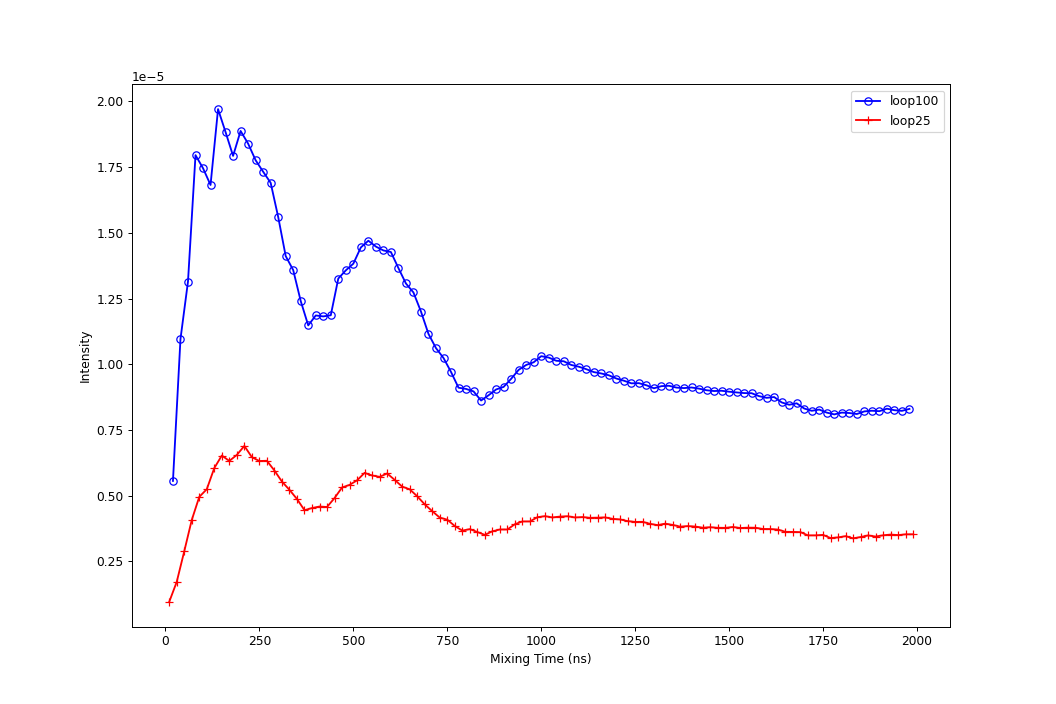

In [147]:
eofe_results_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_outputs/NOVEL/tasks'
eofe_params_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_inputs/NOVEL'
collection_name = 'xband_scan_mix_zcw2_55'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs, ys = collect_results_length(result_dir, param_dir, 'mix')
pos = np.argmax(ys)
print(f'max mixing: {xs[pos]}ns, intensity: {ys[pos]}')

collection_name = 'xband_scan_mix_zcw2_55_loop25'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs2, ys2 = collect_results_length(result_dir, param_dir, 'mix')
pos2 = np.argmax(ys2)
print(f'max mixing: {xs2[pos2]}ns, intensity: {ys2[pos2]}')

fig = plt.figure(figsize=(12, 8), dpi=80)
plt.plot(xs, ys, 'bo-', markerfacecolor='none', label='loop100')
plt.plot(xs2, ys2, 'r+-', markerfacecolor='none', label='loop25')
plt.legend()
plt.xlabel('Mixing Time (ns)')
plt.ylabel('Intensity')
plt.show()

max $\gamma$B1: 14.75MHz, intensity: 1.9614160909565988e-05
max $\gamma$B1: 15.5MHz, intensity: 2.750772903483974e-05
max $\gamma$B1: 15.25MHz, intensity: 1.1815442212440636e-05
[zcw3 55x4] max $\gamma$B1: 15.25MHz, intensity: 1.0857404905962472e-05
max $\gamma$B1: 15.0MHz, intensity: 6.769328605882155e-06
[cnst lvl] max $\gamma$B1: 14.75MHz, intensity: 7.019684703748946e-06
max $\gamma$B1: 15.0MHz, intensity: 5.768691587862209e-06


<IPython.core.display.Javascript object>


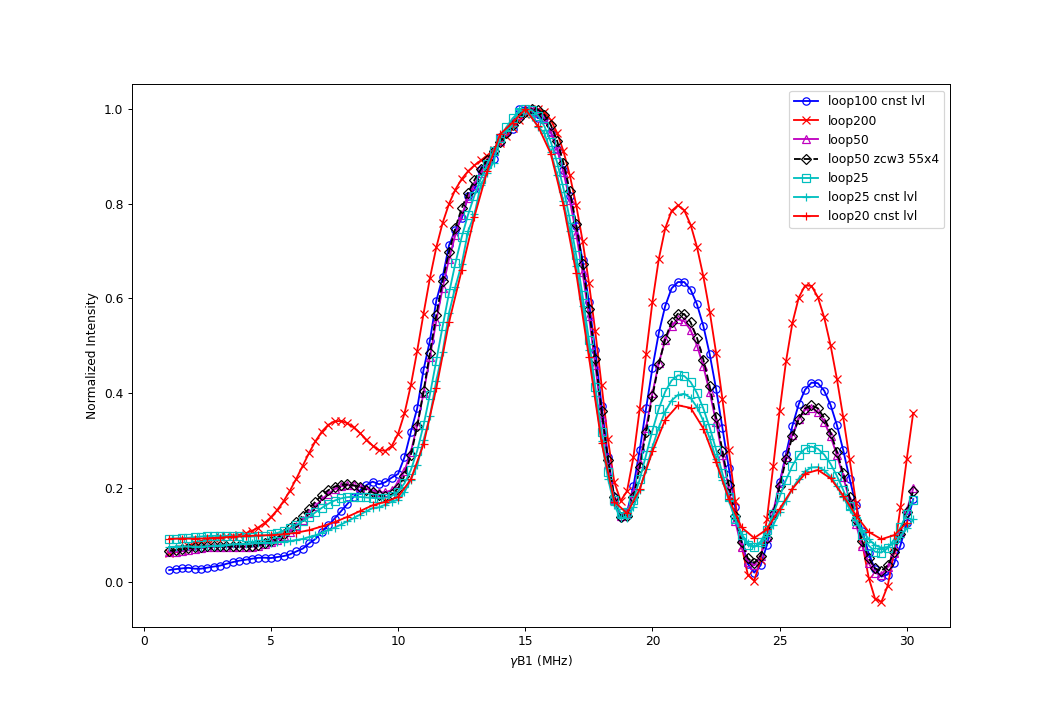

In [152]:
eofe_results_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_outputs/NOVEL/tasks'
eofe_params_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_inputs/NOVEL'
collection_name = 'xband_scan_gB1_zcw2_55'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs, ys = collect_results_gB1(result_dir, param_dir)
pos = np.argmax(ys)
print(f'max $\gamma$B1: {xs[pos]}MHz, intensity: {ys[pos]}')

collection_name = 'xband_scan_gB1_zcw2_55_loop200'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs2, ys2 = collect_results_gB1(result_dir, param_dir)
pos2 = np.argmax(ys2)
print(f'max $\gamma$B1: {xs2[pos2]}MHz, intensity: {ys2[pos2]}')

collection_name = 'xband_scan_gB1_zcw2_55_loop50'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs3, ys3 = collect_results_gB1(result_dir, param_dir)
pos3 = np.argmax(ys3)
print(f'max $\gamma$B1: {xs3[pos3]}MHz, intensity: {ys3[pos3]}')

collection_name = 'xband_scan_gB1_zcw3_55_4_loop50'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs3_2, ys3_2 = collect_results_gB1(result_dir, param_dir)
pos3_2 = np.argmax(ys3_2)
print(f'[zcw3 55x4] max $\gamma$B1: {xs3_2[pos3_2]}MHz, intensity: {ys3_2[pos3_2]}')

collection_name = 'xband_scan_gB1_zcw2_55_loop25'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs4, ys4 = collect_results_gB1(result_dir, param_dir)
pos4 = np.argmax(ys4)
print(f'max $\gamma$B1: {xs4[pos4]}MHz, intensity: {ys4[pos4]}')

collection_name = 'xband_scan_gB1_zcw2_55_loop25_cnst_lvl'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs4_2, ys4_2 = collect_results_gB1(result_dir, param_dir)
pos4_2 = np.argmax(ys4_2)
print(f'[cnst lvl] max $\gamma$B1: {xs4_2[pos4_2]}MHz, intensity: {ys4_2[pos4_2]}')

collection_name = 'xband_scan_gB1_zcw2_55_loop20_cnst_lvl'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs5, ys5 = collect_results_gB1(result_dir, param_dir)
pos5 = np.argmax(ys5)
print(f'max $\gamma$B1: {xs5[pos5]}MHz, intensity: {ys5[pos5]}')


fig = plt.figure(figsize=(12, 8), dpi=80)
plt.plot(xs, np.array(ys)/ys[pos], 'bo-', markerfacecolor='none', label='loop100 cnst lvl')
plt.plot(xs2, np.array(ys2)/ys2[pos2], 'rx-', markerfacecolor='none', label='loop200')
plt.plot(xs3, np.array(ys3)/ys3[pos3], 'm^-', markerfacecolor='none', label='loop50')
plt.plot(xs3_2, np.array(ys3_2)/ys3_2[pos3_2], 'kD--', markerfacecolor='none', label='loop50 zcw3 55x4')
plt.plot(xs4, np.array(ys4)/ys4[pos4], 'cs-', markerfacecolor='none', label='loop25')
plt.plot(xs4_2, np.array(ys4_2)/ys4_2[pos4_2], 'c+-', markerfacecolor='none', label='loop25 cnst lvl')
plt.plot(xs5, np.array(ys5)/ys5[pos5], 'r+-', markerfacecolor='none', label='loop20 cnst lvl')
plt.legend()
plt.xlabel('$\gamma$B1 (MHz)')
plt.ylabel('Normalized Intensity')
plt.show()

max $\gamma$B1: 15.0MHz, intensity: 6.769328605882155e-06
[cnst lvl] max $\gamma$B1: 14.75MHz, intensity: 7.019684703748946e-06
max $\gamma$B1: 15.0MHz, intensity: 4.221786437052582e-05
max $\gamma$B1: 14.0MHz, intensity: 1.1263369667419385e-05


<IPython.core.display.Javascript object>


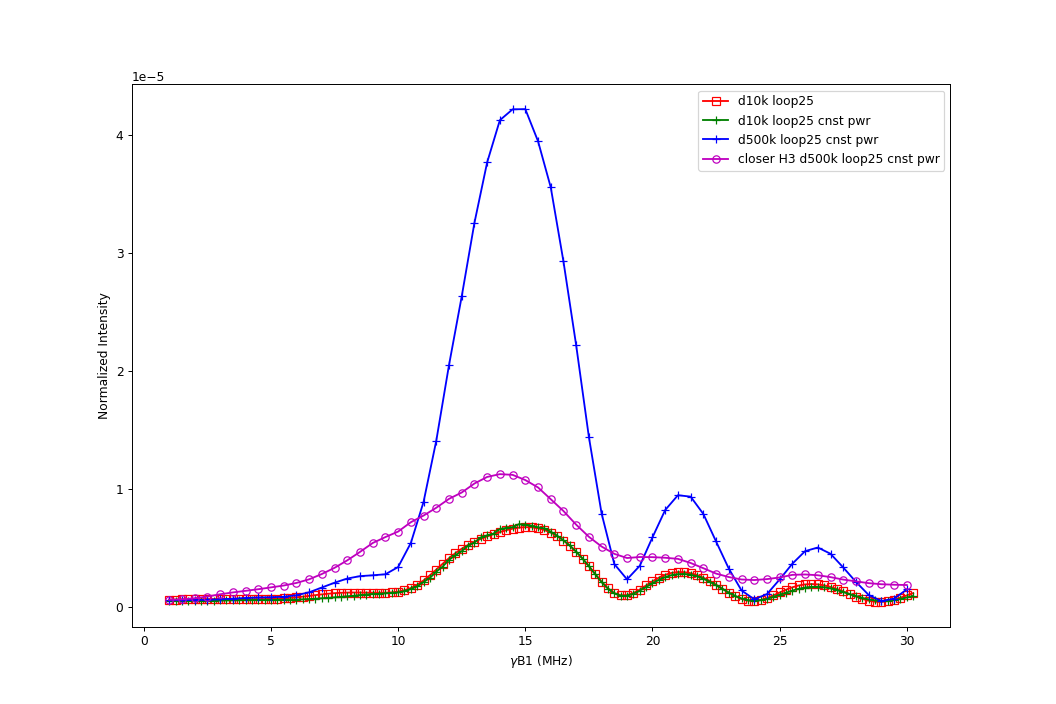

In [176]:
eofe_results_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_outputs/NOVEL/tasks'
eofe_params_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_inputs/NOVEL'


collection_name = 'xband_scan_gB1_zcw2_55_loop25'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs4, ys4 = collect_results_gB1(result_dir, param_dir)
pos4 = np.argmax(ys4)
print(f'max $\gamma$B1: {xs4[pos4]}MHz, intensity: {ys4[pos4]}')

collection_name = 'xband_scan_gB1_zcw2_55_loop25_cnst_lvl'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs4_2, ys4_2 = collect_results_gB1(result_dir, param_dir)
pos4_2 = np.argmax(ys4_2)
print(f'[cnst lvl] max $\gamma$B1: {xs4_2[pos4_2]}MHz, intensity: {ys4_2[pos4_2]}')

collection_name = 'xband_scan_gB1_zcw55_d500k_loop25_cnst_lvl'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs4_3, ys4_3 = collect_results_gB1(result_dir, param_dir)
pos4_3 = np.argmax(ys4_3)
print(f'max $\gamma$B1: {xs4_3[pos4_3]}MHz, intensity: {ys4_3[pos4_3]}')

collection_name = 'xband_p2_scan_gB1_zcw55_d500k_loop25_cnst_lvl'
result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

xs4_4, ys4_4 = collect_results_gB1(result_dir, param_dir)
pos4_4 = np.argmax(ys4_4)
print(f'max $\gamma$B1: {xs4_4[pos4_4]}MHz, intensity: {ys4_4[pos4_4]}')

fig = plt.figure(figsize=(12, 8), dpi=80)
plt.plot(xs4, np.array(ys4), 'rs-', markerfacecolor='none', label='d10k loop25')
plt.plot(xs4_2, np.array(ys4_2), 'g+-', markerfacecolor='none', label='d10k loop25 cnst pwr')
plt.plot(xs4_3, np.array(ys4_3), 'b+-', markerfacecolor='none', label='d500k loop25 cnst pwr')
plt.plot(xs4_4, np.array(ys4_4), 'mo-', markerfacecolor='none', label='closer H3 d500k loop25 cnst pwr')
plt.legend()
plt.xlabel('$\gamma$B1 (MHz)')
plt.ylabel('Normalized Intensity')
plt.show()

xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf100 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf101 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf102 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf103 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf104 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf105 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf106 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf107 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf108 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf109 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf110 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf111 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf112 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf113 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q_pdf114 does not exist.
xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q

<IPython.core.display.Javascript object>


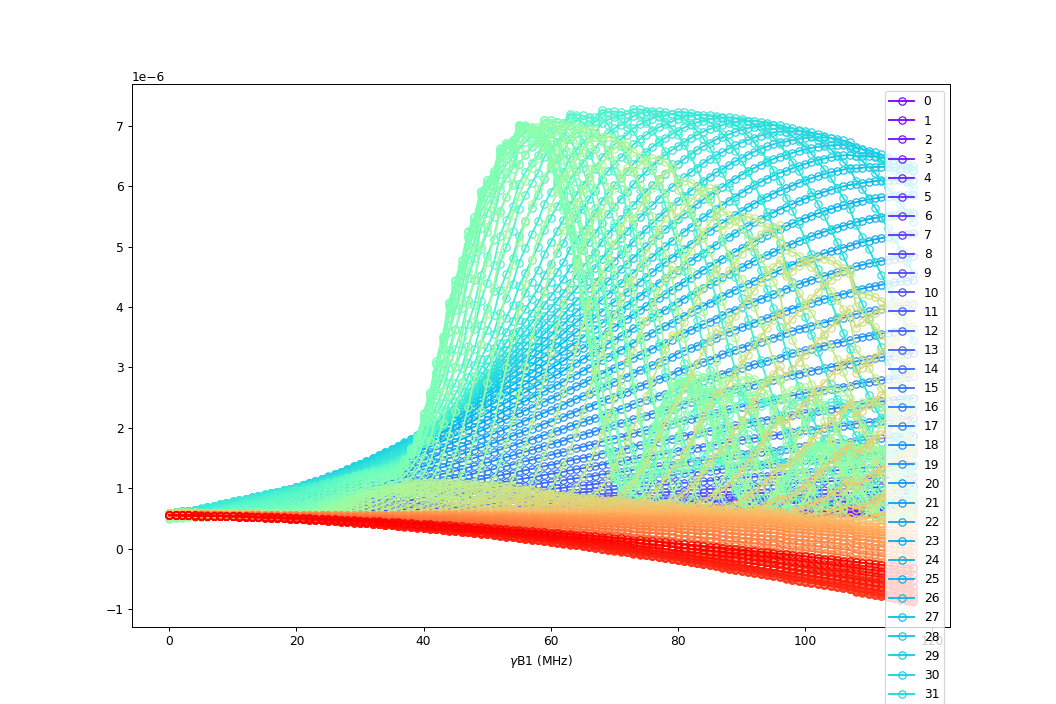

In [153]:
eofe_results_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_outputs/NOVEL/tasks'
eofe_params_root = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/eofe_inputs/NOVEL'
collection_name = 'xband_scan_gB1_zcw2_55_loop25_cnst_lvl_q'
results = []
pdf_collection_names = [f'{collection_name}_pdf{i:03d}' for i in range(120)]

for pdf_collection_name in pdf_collection_names:
    try:
        result_dir = os.path.join(eofe_results_root, collection_name, f'{pdf_collection_name}_results')
        param_dir = os.path.join(eofe_params_root, collection_name, pdf_collection_name)

        _, ys = collect_results_gB1(result_dir, param_dir)
        results.append(ys)
    except Exception as e:
        print(f'{pdf_collection_name} does not exist.')

result_dir = os.path.join(eofe_results_root, collection_name, f'{collection_name}_results')
param_dir = os.path.join(eofe_params_root, collection_name, collection_name)

# xs, _ = collect_results_gB1(result_dir, param_dir)
xs = np.arange(len(ys))

fig = plt.figure(figsize=(12, 8), dpi=80)
colors = plt.cm.rainbow(np.linspace(0, 1, len(results)))
for i in range(len(results)):
    ys = results[i]
    c = colors[i]
    plt.plot(xs, ys, 'o-', color=c, markerfacecolor='none', label=f'{i}')
plt.legend()
plt.xlabel('$\gamma$B1 (MHz)')
plt.show()

In [154]:
arr = np.stack(results)
arr.shape

(100, 118)

In [167]:
x = np.arange(100)
pdf = norm.pdf(x, loc=49.5, scale=20)

In [168]:
z = np.sum(pdf)
z

0.9875897965077921

In [169]:
vals = np.dot(pdf[:, np.newaxis].T, arr)

<IPython.core.display.Javascript object>


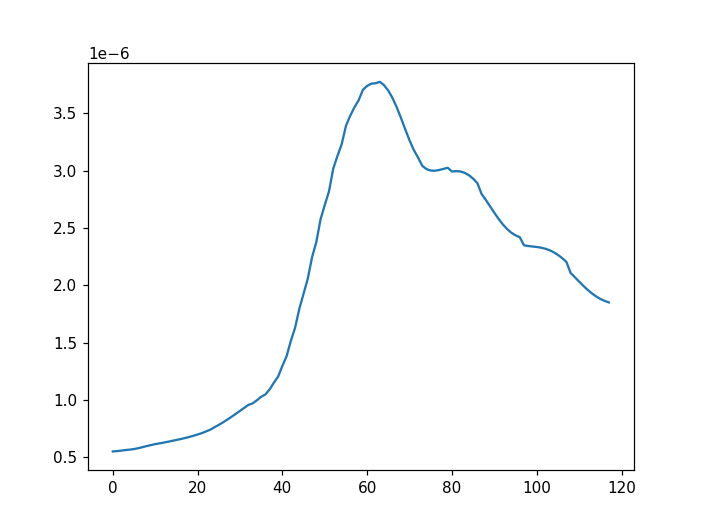

In [170]:
fig = plt.figure()
plt.plot(xs, vals.ravel())
plt.show()